### Preprocessing the Data for a Neural Network

In [33]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

# Callback file path
os.makedirs("checkpoints1/", exist_ok=True)
os.makedirs("checkpoints2/", exist_ok=True)
os.makedirs("checkpoints3/", exist_ok=True)
checkpoint_path1 = "checkpoints1/weights.{epoch:02d}.hdf5"
checkpoint_path2 = "checkpoints2/weights.{epoch:02d}.hdf5"
checkpoint_path3 = "checkpoints3/weights.{epoch:02d}.hdf5"


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(20)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"],axis=1)
application_df.head(2)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
use_counts = application_df.USE_CASE.value_counts()
use_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [5]:
# Determine which values to replace if counts are less than ...?
replace_USE = list(use_counts[use_counts < 500].index)

# Replace in dataframe
for app in replace_USE:
    application_df.USE_CASE = application_df.USE_CASE.replace(app,"ComServ/Health")
    
# Check to make sure binning was successful
application_df.USE_CASE.value_counts()


Preservation      28095
ProductDev         5671
ComServ/Health      533
Name: USE_CASE, dtype: int64

In [6]:
org_counts = application_df.ORGANIZATION.value_counts()
org_counts


Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_ORGANIZATION = list(org_counts[org_counts < 500].index)

# Replace in dataframe
for app in replace_ORGANIZATION:
    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(app,"Co-op/Corp")
    
# Check to make sure binning was successful
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
Co-op/Corp       529
Name: ORGANIZATION, dtype: int64

In [8]:
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [9]:
application_df = application_df.drop(columns=["SPECIAL_CONSIDERATIONS"],axis=1)

In [10]:
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [11]:
application_df = application_df.drop(columns=["STATUS"], axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-op/Corp,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,ComServ/Health,Trust,100000-499999,142590,1


In [12]:
income_counts = application_df.INCOME_AMT.value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [13]:
# Determine which values to replace if counts are less than ...?
replace_INCOME_AMT = list(income_counts[income_counts < 500].index)

# Replace in dataframe
for app in replace_INCOME_AMT:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(app,"5M+")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
5M+                564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [14]:
affiliation_counts = application_df.AFFILIATION.value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [15]:
# Determine which values to replace if counts are less than ...?
replace_AFFILIATION = list(affiliation_counts[affiliation_counts < 500].index)

# Replace in dataframe
for app in replace_AFFILIATION:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

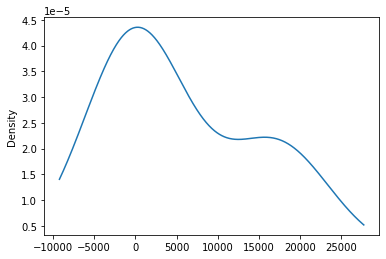

In [16]:
# Visualize the value counts of AFFILIATION
affiliation_counts.plot.density()

In [17]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

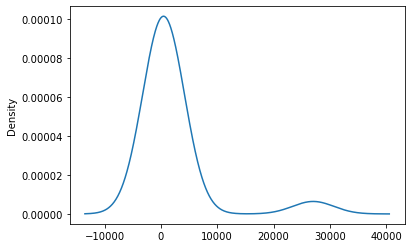

In [18]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [19]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [20]:
# Look at CLASSIFICATION value counts for binning
app_class_count = application_df.CLASSIFICATION.value_counts()
app_class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

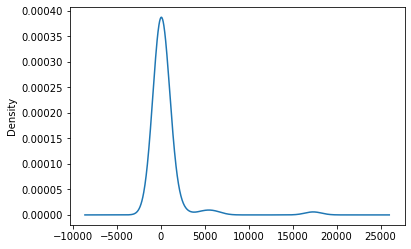

In [21]:
# Visualize the value counts of CLASSIFICATION
app_class_count.plot.density()

In [22]:
# Determine which values to replace if counts are less than ..?
replace_class = list(app_class_count[app_class_count < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()
#application_df = application_df.drop(columns=["CLASSIFICATION"])

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [23]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [24]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\bkuro\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ORGANIZATION_Association,ORGANIZATION_Co-op/Corp,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
# Merge one-hot encoded features and drop the originals
application_df2 = application_df.merge(encode_df, left_index=True, right_index=True)
application_df2 = application_df2.drop(columns = application_cat)
#application_df = application_df.drop(columns = ["ASK_AMT"])# df.drop(columns =['C', 'D'])
application_df2.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Association,ORGANIZATION_Co-op/Corp,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# Split our preprocessed data into our features and target arrays
X = application_df2.drop(["IS_SUCCESSFUL"],1).values
y = application_df2["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

<ipython-input-27-f029725f5a67>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df2.drop(["IS_SUCCESSFUL"],1).values


In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-0.03147628, -0.06023636, -0.12439654, ..., -0.17353307,
         2.87342428, -0.13161245],
       [-0.03160778, -0.06023636, -0.12439654, ..., -0.17353307,
        -0.34801683, -0.13161245],
       [-0.03160778, -0.06023636, -0.12439654, ..., -0.17353307,
        -0.34801683, -0.13161245],
       ...,
       [-0.03160778, -0.06023636, -0.12439654, ..., -0.17353307,
        -0.34801683, -0.13161245],
       [-0.03160778, -0.06023636, -0.12439654, ..., -0.17353307,
        -0.34801683, -0.13161245],
       [-0.03160778, -0.06023636, -0.12439654, ..., -0.17353307,
        -0.34801683, -0.13161245]])

## Deliverable 2: Compile, Train and Evaluate the Model

### MODEL ONE Standard Investigation: add one layer

In [30]:

#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80   
hidden_nodes_layer2 = 50   
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation='relu', kernel_regularizer=regularizers.l2(0.01))
)

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2880      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,971
Trainable params: 7,971
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the second model
nn.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [34]:
# Create a callback, saving the weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path1,
    verbose = 1,
    save_weights_only=True,
    save_freq = 'epoch')

In [35]:
# Train the second model
fit_model1 = nn.fit(X_train_scaled,y_train,epochs = 40, callbacks=[cp_callback])

Epoch 1/40


W0519 14:05:31.560763 31040 ag_logging.py:142] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000001E9F01B3430> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
798/804 [============================>.] - ETA: 0s - loss: 0.8480 - accuracy: 0.7186
Epoch 1: saving model to checkpoints1\weights.01.hdf5
804/804 [==============================] - 7s 5ms/step - loss: 0.8464 - accuracy: 0.7186
Epoch 2/40
801/804 [============================>.] - ETA: 0s - loss: 0.5981 - accuracy: 0.7247
Epoch 2: saving model to checkpoints1\weights.02.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5978 - accuracy: 0.7249
Epoch 3/40
798/804 [============================>.] - ETA: 0s - loss: 0.5913 - accuracy: 0.7256
Epoch 3: saving model to checkpoints1\weights.03.hdf5
804/804 [==============================] - 4s 6ms/step - loss: 0.5907 - accuracy

795/804 [============================>.] - ETA: 0s - loss: 0.5729 - accuracy: 0.7279
Epoch 33: saving model to checkpoints1\weights.33.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5732 - accuracy: 0.7277
Epoch 34/40
795/804 [============================>.] - ETA: 0s - loss: 0.5728 - accuracy: 0.7282
Epoch 34: saving model to checkpoints1\weights.34.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5725 - accuracy: 0.7283
Epoch 35/40
798/804 [============================>.] - ETA: 0s - loss: 0.5726 - accuracy: 0.7283
Epoch 35: saving model to checkpoints1\weights.35.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5725 - accuracy: 0.7285
Epoch 36/40
802/804 [============================>.] - ETA: 0s - loss: 0.5727 - accuracy: 0.7285
Epoch 36: saving model to checkpoints1\weights.36.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5726 - accuracy: 0.7287
Epoch 37/40
795/804 [===========================

In [36]:
# Evaluate the model using the test datad,y_test,verbose=2)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

W0519 14:08:31.617891 31040 ag_logging.py:142] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E9EB54A430> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
268/268 - 2s - loss: 0.5649 - accuracy: 0.7320 - 2s/epoch - 8ms/step
Loss: 0.5648872256278992, Accuracy: 0.7320116758346558


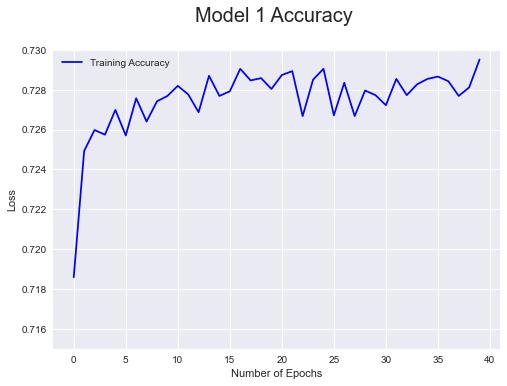

In [45]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Model 1 Accuracy \n',fontsize=20)
plt.plot(fit_model1.history['accuracy'], 'blue', label='Training Accuracy')
#plt.plot(fit_model1.history['model_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.ylim(0.715, 0.730)
plt.legend()
plt.show()

### MODEL NEGATIVE ONE Unviable re-inclusion of the NAME column from the dataset 


#Three layers with 20, 10, and 5 nodes 
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn.summary()

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
#optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
#Compile the model
nn.compile(loss="binary_crossentropy", optimizer=
           tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam") ,metrics=["accuracy"])

#nn.compile(loss='loss_mean_squared_logarithmic_error', optimizer=opt,metrics=["accuracy"])
#nn.compile(optimizer='sgd',
             #loss=tf.keras.losses.MeanSquaredLogarithmicError(),metrics=["accuracy"])

#Create a callback, saving the weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only=True,
    save_freq = 'epoch')

#Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs = 50, callbacks=[cp_callback])

#Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000225622723A0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
268/268 - 18s - loss: 0.6224 - accuracy: 0.7928 - 18s/epoch - 68ms/step
### Loss: 0.622370719909668, Accuracy: 0.7927696704864502

## Model Two

In [47]:
# Investigate modifications of relu - especially negativity possibilities
from tensorflow.keras.layers import LeakyReLU
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80   #15
hidden_nodes_layer2 = 50   #5
hidden_nodes_layer3 = 20

nn2 = tf.keras.models.Sequential()
#nn.add(LeakyReLU(alpha=0.05))

# Leaky addition
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu')
)
# Second hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1))
)

# Third hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='elu')
)
# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                2880      
                                                                 
 dense_5 (Dense)             (None, 50)                4050      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,971
Trainable params: 7,971
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the second model
nn2.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [49]:
# Create a callback, saving the weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path2,
    verbose = 1,
    save_weights_only=True,
    save_freq = 'epoch')

In [50]:
# Train the second model
fit_model2 = nn2.fit(X_train_scaled,y_train,epochs = 40, callbacks=[cp_callback])

Epoch 1/40


W0519 14:15:11.768899 31040 ag_logging.py:142] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000001E9F83D1D30> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
799/804 [============================>.] - ETA: 0s - loss: 0.5691 - accuracy: 0.7210
Epoch 1: saving model to checkpoints2\weights.01.hdf5
804/804 [==============================] - 6s 5ms/step - loss: 0.5694 - accuracy: 0.7206
Epoch 2/40
804/804 [==============================] - ETA: 0s - loss: 0.5555 - accuracy: 0.7281
Epoch 2: saving model to checkpoints2\weights.02.hdf5
804/804 [==============================] - 4s 6ms/step - loss: 0.5555 - accuracy: 0.7281
Epoch 3/40
798/804 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.7299
Epoch 3: saving model to checkpoints2\weights.03.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5526 - accuracy

799/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7362
Epoch 33: saving model to checkpoints2\weights.33.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5402 - accuracy: 0.7365
Epoch 34/40
797/804 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7375
Epoch 34: saving model to checkpoints2\weights.34.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5403 - accuracy: 0.7374
Epoch 35/40
802/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7373
Epoch 35: saving model to checkpoints2\weights.35.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5401 - accuracy: 0.7374
Epoch 36/40
801/804 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7369
Epoch 36: saving model to checkpoints2\weights.36.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5398 - accuracy: 0.7368
Epoch 37/40
799/804 [===========================

In [51]:
# Evaluate the model using the test datad,y_test,verbose=2)
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

W0519 14:18:19.779096 31040 ag_logging.py:142] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E9F87074C0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
268/268 - 2s - loss: 0.5447 - accuracy: 0.7353 - 2s/epoch - 8ms/step
Loss: 0.5446740388870239, Accuracy: 0.735276997089386


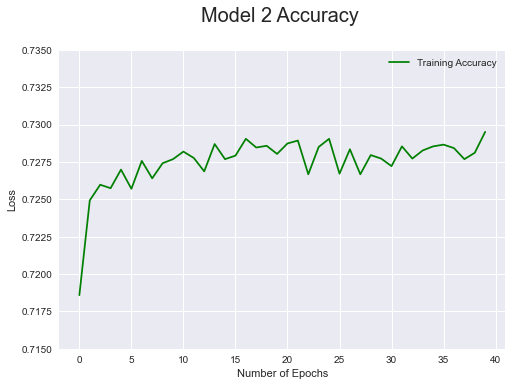

In [53]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Model 2 Accuracy \n',fontsize=20)
plt.plot(fit_model1.history['accuracy'], 'green', label='Training Accuracy')
#plt.plot(fit_model1.history['model_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.ylim(0.715, 0.735)
plt.legend()
plt.show()

## Model Three

In [66]:
# Investigate modifications with Tanh using Parametric Rectified Linear Unit for possible negativities

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80   
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 50   
hidden_nodes_layer4 = 30

nn3 = tf.keras.models.Sequential()

# First
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
    #tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.2))
)
# Second hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.2))
    #tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# Thrid hidden layer
nn3.add(
   tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh")
)
# Fourth hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh")
)


# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                2880      
                                                                 
 dense_19 (Dense)            (None, 80)                6480      
                                                                 
 dense_20 (Dense)            (None, 50)                4050      
                                                                 
 dense_21 (Dense)            (None, 30)                1530      
                                                                 
 dense_22 (Dense)            (None, 1)                 31        
                                                                 
Total params: 14,971
Trainable params: 14,971
Non-trainable params: 0
_________________________________________________________________


Compile Adam
nn3.compile(loss="binary_crossentropy", optimizer=
           tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    decay=0.0001,
    name="Adam") ,metrics=["accuracy"])


nn3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
) ,metrics=["accuracy"])

In [67]:
nn3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
) ,metrics=["accuracy"])

In [68]:
# Create a callback, saving the weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path3,
    verbose = 1,
    save_weights_only=True,
    save_freq = 'epoch')

In [69]:
# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs = 80, callbacks=[cp_callback])

Epoch 1/80


W0519 14:49:51.300110 31040 ag_logging.py:142] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000001E9F85AC670> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
800/804 [============================>.] - ETA: 0s - loss: 0.5721 - accuracy: 0.7168
Epoch 1: saving model to checkpoints3\weights.01.hdf5
804/804 [==============================] - 6s 6ms/step - loss: 0.5720 - accuracy: 0.7170
Epoch 2/80
800/804 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7280
Epoch 2: saving model to checkpoints3\weights.02.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5559 - accuracy: 0.7280
Epoch 3/80
800/804 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7287
Epoch 3: saving model to checkpoints3\weights.03.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5532 - accuracy

804/804 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.7357
Epoch 33: saving model to checkpoints3\weights.33.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5410 - accuracy: 0.7357
Epoch 34/80
801/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7351
Epoch 34: saving model to checkpoints3\weights.34.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.5412 - accuracy: 0.7352
Epoch 35/80
804/804 [==============================] - ETA: 0s - loss: 0.5409 - accuracy: 0.7353
Epoch 35: saving model to checkpoints3\weights.35.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5409 - accuracy: 0.7353
Epoch 36/80
798/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7364
Epoch 36: saving model to checkpoints3\weights.36.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5408 - accuracy: 0.7364
Epoch 37/80
803/804 [===========================

798/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7377
Epoch 67: saving model to checkpoints3\weights.67.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5375 - accuracy: 0.7377
Epoch 68/80
802/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7380
Epoch 68: saving model to checkpoints3\weights.68.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5379 - accuracy: 0.7378
Epoch 69/80
800/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7385
Epoch 69: saving model to checkpoints3\weights.69.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5377 - accuracy: 0.7383
Epoch 70/80
801/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7381
Epoch 70: saving model to checkpoints3\weights.70.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5375 - accuracy: 0.7382
Epoch 71/80
800/804 [===========================

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


W0519 15:35:09.220746 31040 ag_logging.py:142] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E9F88E33A0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
268/268 - 3s - loss: 0.5444 - accuracy: 0.7340 - 3s/epoch - 10ms/step
Loss: 0.5444025993347168, Accuracy: 0.73399418592453


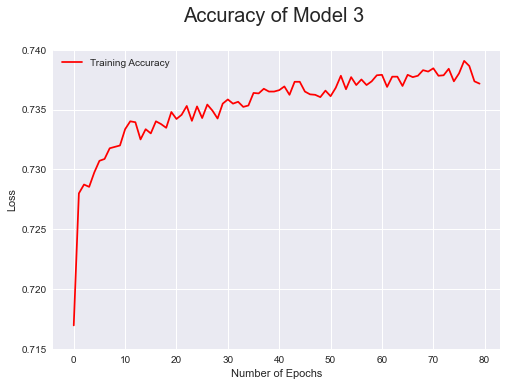

In [75]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy of Model 3 \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'red', label='Training Accuracy')
#plt.plot(fit_model.history['val_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.ylim(0.715, 0.740)
plt.legend()
plt.show()

## Model 4 - Curiosity

In [76]:
#Three layers with 20, 10, and 5 nodes 
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

nn4 = tf.keras.models.Sequential()

nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="gelu"))

nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="gelu"))

nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 20)                720       
                                                                 
 dense_24 (Dense)            (None, 10)                210       
                                                                 
 dense_25 (Dense)            (None, 5)                 55        
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the curiosity model
nn4.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [81]:
#Train the model
fit_model4 = nn4.fit(X_train_scaled,y_train,epochs = 80)

Epoch 1/80
804/804 [==============================] - 5s 6ms/step - loss: 0.5410 - accuracy: 0.7362
Epoch 2/80
804/804 [==============================] - 5s 6ms/step - loss: 0.5410 - accuracy: 0.7356
Epoch 3/80
804/804 [==============================] - 4s 6ms/step - loss: 0.5414 - accuracy: 0.7362
Epoch 4/80
804/804 [==============================] - 4s 6ms/step - loss: 0.5409 - accuracy: 0.7368
Epoch 5/80
804/804 [==============================] - 4s 5ms/step - loss: 0.5409 - accuracy: 0.7363
Epoch 6/80
804/804 [==============================] - 4s 6ms/step - loss: 0.5407 - accuracy: 0.7362
Epoch 7/80
804/804 [==============================] - 4s 5ms/step - loss: 0.5409 - accuracy: 0.7365
Epoch 8/80
804/804 [==============================] - 4s 5ms/step - loss: 0.5409 - accuracy: 0.7369
Epoch 9/80
804/804 [==============================] - 4s 6ms/step - loss: 0.5406 - accuracy: 0.7367
Epoch 10/80
804/804 [==============================] - 5s 6ms/step - loss: 0.5406 - accuracy: 0.7366

In [82]:
#Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.5457 - accuracy: 0.7343 - 2s/epoch - 7ms/step
Loss: 0.5457025766372681, Accuracy: 0.7343440055847168


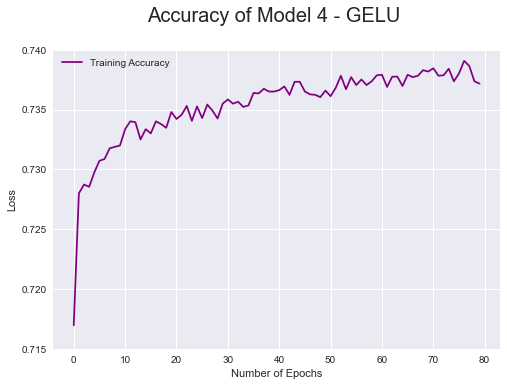

In [83]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy of Model 4 - GELU \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'purple', label='Training Accuracy')
#plt.plot(fit_model.history['val_accuracy'], 'blue',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.ylim(0.715, 0.740)
plt.legend()
plt.show()

In [141]:
#size_histories = {}
#size_histories['Run3'] = compile_and_fit(nn3, 'sizes/Run3')

NameError: name 'compile_and_fit' is not defined

In [40]:
#plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
#plotter.plot(size_histories)
#plt.ylim([0.5, 0.7])

NameError: name 'size_histories' is not defined